In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/df_preprocessed.csv")
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,N,Spain,H,27,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,0.0,1
606653,N,Spain,H,56,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2013,9,2,1.0,1
606654,N,Spain,V,39,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1
606655,N,Spain,V,36,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [4]:
import pickle
col_transformer = pickle.load(open('col_transformer.pkl', 'rb'))

In [68]:
df.columns

Index(['emp_index', 'cust_residence', 'cust_gender', 'age', 'new_cust_index',
       'cust_seniority', 'indrel', 'cust_type', 'cust_rel_time',
       'cust_res_index', 'is_foreign', 'channel_to_join', 'deceased_index',
       'name_province', 'activity_index', 'household_income', 'saving_acc',
       'guarantees', 'current_acc', 'derivada_acc', 'payroll_acc',
       'junior_acc', 'mass_particular_acc', 'particular_acc',
       'particular_plus_acc', 'short_term_deposit', 'medium_term_deposits',
       'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions1',
       'loans', 'taxes', 'credit_card', 'securities', 'home_account',
       'payroll', 'pensions2', 'direct_debit', 'first_holder_date_year',
       'first_holder_date_month', 'first_holder_date_day', 'total_accounts',
       'dup_rows_count'],
      dtype='object')

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

transformer

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('onehotencoder-1',
                                  OneHotEncoder(top_categories=4,
                                                variables=['emp_index'])),
                                 ('onehotencoder-2',
                                  OneHotEncoder(variables=['cust_gender',
                                                           'cust_rel_time',
                                                           'cust_residence'])),
                                 ('countfrequencyencoder',
                                  CountFrequencyEncoder(encoding_method='frequency',
                                                        variables=['name_province',
                                                                   'channel_to_join']))])),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
           

In [78]:
%%time
arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))
arr

Wall time: 12.4 s


array([[ 4.67566163,  9.35954711, -6.17348192],
       [-9.71453208, -8.08004421,  0.06393475],
       [-9.62338597, -8.11980707,  0.05256404],
       ...,
       [12.51506047, -4.4237834 ,  6.22162024],
       [ 9.71569532, -4.6203938 , -3.34978255],
       [ 6.78242734,  9.69758905, -3.2218401 ]])

In [79]:
new_df = pd.DataFrame({
    "PCA1" : arr[:,0],
    "PCA2" : arr[:,1],
    "PCA3" : arr[:,2]
})

new_df

,PCA1,PCA2,PCA3
0,4.675662,9.359547,-6.173482
1,-9.714532,-8.080044,0.063935
2,-9.623386,-8.119807,0.052564
3,-9.726665,6.022306,6.912986
4,6.166344,-4.865414,-7.029743
...,...,...,...
606652,8.355058,9.661442,2.851517
606653,4.558111,9.303153,-6.036762
606654,12.515060,-4.423783,6.221620
606655,9.715695,-4.620394,-3.349783


Total Variance Ratio: 58.693 %


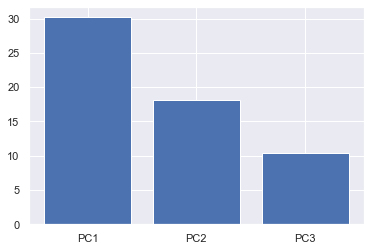

In [80]:
print(f"Total Variance Ratio: {np.sum(transformer.named_steps.pca.explained_variance_ratio_)* 100:.3f} %")

per_var = np.round(transformer.named_steps.pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels);

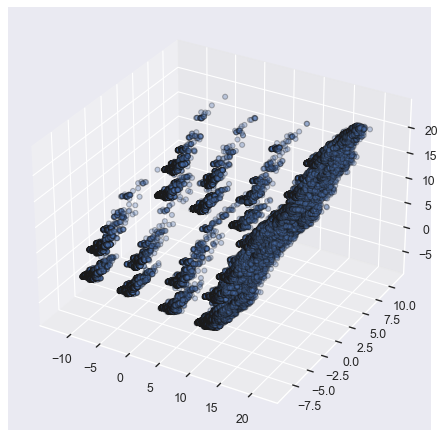

In [81]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PCA1'], new_df['PCA2'], new_df['PCA3'], alpha = 0.3, edgecolor = "k");

In [86]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = new_df.values
Y = df['dup_rows_count'].values

wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
predicted_kmeans = kmeans.predict(X, sample_weight = Y)

Wall time: 6.9 s


In [89]:
new_df['cluster'] = predicted_kmeans
new_df

,PCA1,PCA2,PCA3,cluster
0,4.675662,9.359547,-6.173482,3
1,-9.714532,-8.080044,0.063935,2
2,-9.623386,-8.119807,0.052564,2
3,-9.726665,6.022306,6.912986,0
4,6.166344,-4.865414,-7.029743,4
...,...,...,...,...
606652,8.355058,9.661442,2.851517,3
606653,4.558111,9.303153,-6.036762,3
606654,12.515060,-4.423783,6.221620,1
606655,9.715695,-4.620394,-3.349783,4


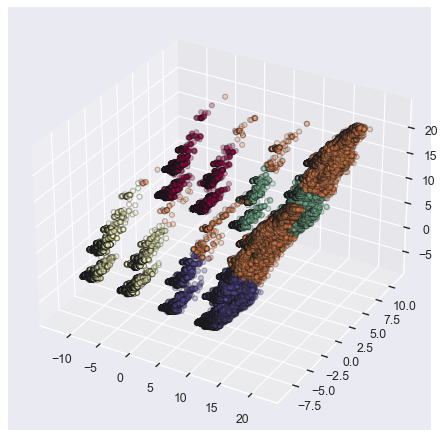

In [100]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PCA1'], new_df['PCA2'], new_df['PCA3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');